### Force-directed layout of the ff supply chains

**Layout 1: network based on edge impedances**

**Layout 2: network based on flows**
Two panel: Geospatial (L) and force-directed (R)

In [1]:
import os, pickle
import json
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from shapely import geometry

import geopandas as gpd


Bad key "text.kerning_factor" on line 4 in
/home/ubuntu/miniconda3/envs/ffsc/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [5]:
from make_network import *

In [2]:
colors = {
    'coal_mines':           '#89163e',
    'oil_fields':           '#001c49',
    'well_pads':            '#6c0093',
    'processing_plants':    '#be46a6',
    'refineries':           '#be46a6',
    'ports':                '#7f5636',
    'lng':                  '#46beb1',
    'shipping':             '#7f5636',
    'pipelines':            '#006400',
    'railways':             '#646464',
    'cities':               '#96C3E4',
    'power_stations':       '#8ac27e',
}

In [3]:
all_data_dirs = {
            'cities-N':              os.path.join('.','..','results_backup','simplify','cities_nodes_dataframe.csv'),
            'pipelines-cities':      os.path.join('.','..','results_backup','simplify','cities_pipelines_edge_dataframe.csv'),
            'ports-cities':          os.path.join('.','..','results_backup','output','cities_ports_edge_dataframe.csv'),
            'railways-cities':       os.path.join('.','..','results_backup','simplify','cities_railways_edge_dataframe_alt.csv'),
            'coalmines-railways':    os.path.join('.','..','results_backup','simplify','coal_mine_railway_edge_dataframe.csv'),
            'coalmines-N':           os.path.join('.','..','results_backup','output','coal_mines_nodes_dataframe.csv'),
            'lng-N':                 os.path.join('.','..','results_backup','output','lng_nodes_dataframe.csv',  ),
            'lng-pipelines':         os.path.join('.','..','results_backup','simplify','lng_pipeline_edge_dataframe.csv'),
            'lng-shipping':          os.path.join('.','..','results_backup','output','lng_shipping_route_edge_dataframe.csv'),
            'oilfields-pipelines':   os.path.join('.','..','results_backup','simplify','oil_field_edge_dataframe.csv'),
            'oilfields-N':           os.path.join('.','..','results_backup','oil_field_nodes_fixup.csv'),
            'pipelines-pipelines':   os.path.join('.','..','results_backup','simplify','pipeline_edge_dataframe.csv'),
            'pipelines-N':           os.path.join('.','..','results_backup','simplify','pipeline_node_dataframe.csv'),
            'ports-N':               os.path.join('.','..','results_backup','output','port_node_dataframe.csv',  ),
            'ports-pipelines':       os.path.join('.','..','results_backup','simplify','port_pipeline_edge_dataframe.csv'),
            'ports-shipping':        os.path.join('.','..','results_backup','output','port_ship_edge_dataframe.csv'),
            'ports-railways':        os.path.join('.','..','results_backup','simplify','port_railway_edge_dataframe.csv'),
            'powerstn-N':            os.path.join('.','..','results_backup','output','power_station_nodes_dataframe.csv'),
            'powerstn-pipelines':    os.path.join('.','..','results_backup','simplify','power_station_pipeline_edge_dataframe.csv'),
            'powerstn-railways':     os.path.join('.','..','results_backup','simplify','power_station_railway_edge_dataframe.csv'),
            'procplant-N':           os.path.join('.','..','results_backup','output','processing_plant_nodes_dataframe.csv'),
            'procplant-pipelines':   os.path.join('.','..','results_backup','simplify','processing_plant_pipeline_edge_dataframe.csv'),
            'railways-railways':     os.path.join('.','..','results_backup','simplify','railway_edge_dataframe.csv'),
            'railways-N':            os.path.join('.','..','results_backup','simplify','railway_nodes_dataframe.csv'),
            'refineries-N':          os.path.join('.','..','results_backup','output','refinery_nodes_dataframe.csv'),
            'refineries-pipelines':  os.path.join('.','..','results_backup','simplify','refinery_pipeline_edge_dataframe.csv'),
            'shipping-shipping':     os.path.join('.','..','results_backup','output','shipping_edge_dataframe.csv'),
            'shipping-N':            os.path.join('.','..','results_backup','output','shipping_node_dataframe.csv'),
            'wellpads-N':            os.path.join('.','..','results_backup','output','well_pad_nodes_dataframe.csv'),
            'wellpads-pipelines':    os.path.join('.','..','results_backup','simplify','well_pad_pipeline_edge_dataframe.csv'),
        }

In [6]:
ps = pd.read_csv(all_data_dirs['powerstn-N'])

In [9]:
ps[ps['fuel1'].isin(['Gas','Coal','Oil'])]

,PowerStationID:ID(PowerStation),capacity_mw,country,country_long,fuel1,gppd_idnr,latitude,longitude,name,owner,source,url,coordinates,type,:LABEL
4,power_station_4,42.0,AFG,Afghanistan,Gas,GEODB0040540,34.5638,69.1134,NorthwestKabulPowerPlantAfghanistan,Unknown,GEODB,http://globalenergyobservatory.org,"[69.1134, 34.5638]",Point,PowerStation
15,power_station_15,520.0,DZA,Algeria,Gas,WRI1023776,35.8665,6.0262,AinDjasser,SociÃÂteAlgÃÂriennedeProductiondelElectricitÃÂ,Arab Union of Electricity,http://www.auptde.org/NewsDetails.aspx?lang=en...,"[6.0262, 35.8665]",Point,PowerStation
16,power_station_16,71.0,DZA,Algeria,Gas,WRI1023795,36.8924,7.7634,Annaba,SociÃÂtÃÂAlgÃÂriennedeProductiondelÃââElectric...,Arab Union of Electricity,http://www.auptde.org/NewsDetails.aspx?lang=en...,"[7.7634, 36.8924]",Point,PowerStation
17,power_station_17,560.0,DZA,Algeria,Gas,WRI1023777,36.5988,3.1375,Arbaa,Sonelgaz,Arab Union of Electricity,http://www.auptde.org/NewsDetails.aspx?lang=en...,"[3.1375, 36.5988]",Point,PowerStation
18,power_station_18,100.0,DZA,Algeria,Gas,WRI1023792,36.5914,2.9223,Boufarik1,Unknown,Arab Union of Electricity,http://www.auptde.org/NewsDetails.aspx?lang=en...,"[2.9223, 36.5914]",Point,PowerStation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28656,power_station_28656,300.0,ZMB,Zambia,Coal,WRI1022376,-17.3529,27.1870,Maamba,MaambaCollieriesLimited,Nava Bharat,http://www.nbventures.com/power.htm,"[27.187, -17.3529]",Point,PowerStation
28657,power_station_28657,10.0,ZMB,Zambia,Oil,WRI1022390,-12.5500,28.2333,MufuliraNchanga,ZESCO,Energy Regulation Board of Zambia,http://www.erb.org.zm/reports/EnergySectorRepo...,"[28.2333, -12.55]",Point,PowerStation
28659,power_station_28659,50.0,ZMB,Zambia,Oil,WRI1022386,-12.9667,28.6333,Ndola,ZESCO,Energy Regulation Board of Zambia,http://www.erb.org.zm/reports/EnergySectorRepo...,"[28.6333, -12.9667]",Point,PowerStation
28660,power_station_28660,20.0,ZMB,Zambia,Oil,WRI1022384,-12.8167,28.2000,Nkana,ZESCO,Energy Regulation Board of Zambia,http://www.erb.org.zm/reports/EnergySectorRepo...,"[28.2, -12.8167]",Point,PowerStation


In [5]:
gen = make_nx('gas')

{'pipelines-cities': {'gas': 0, 'coal': 0, 'oil': 0}, 'ports-cities': {'gas': 0, 'coal': 0, 'oil': 0}, 'railways-cities': {'gas': 0, 'coal': 0, 'oil': 0}, 'coalmines-railways': {'gas': 0, 'coal': 0, 'oil': 0}, 'lng-pipelines': {'gas': 0, 'coal': 0, 'oil': 0}, 'lng-shipping': {'gas': 3063.4560063711274, 'coal': 0, 'oil': 0}, 'oilfields-pipelines': {'gas': 0, 'coal': 0, 'oil': 0}, 'pipelines-pipelines': {'gas': 0.1304728626096061, 'coal': 0, 'oil': 0.3073277895310929}, 'ports-pipelines': {'gas': 0, 'coal': 0, 'oil': 0}, 'ports-shipping': {'gas': 27.472527472527478, 'coal': 48.75670404680645, 'oil': 34.11921252857485}, 'ports-railways': {'gas': 0, 'coal': 0, 'oil': 0}, 'powerstn-pipelines': {'gas': 0, 'coal': 0, 'oil': 0}, 'powerstn-railways': {'gas': 0, 'coal': 0, 'oil': 0}, 'procplant-pipelines': {'gas': 0, 'coal': 0, 'oil': 0}, 'railways-railways': {'gas': 0, 'coal': 0.08667858497210033, 'oil': 0}, 'refineries-pipelines': {'gas': 0, 'coal': 0, 'oil': 0}, 'shipping-shipping': {'gas': 0.

In [6]:
gen.all_data_dirs = all_data_dirs

In [7]:
gen._load_dfs()

In [8]:
gen._fill_graph()

INFO:make_network:doing step add wellpads -> pipelines...
INFO:make_network:doing step add fields -> pipelines...
INFO:make_network:doing step add pipelines -> pipelines...
INFO:make_network:doing step add pipelines <- pipelines...
INFO:make_network:doing step add pipelines -> lng...
INFO:make_network:doing step add pipelines <- lng...
INFO:make_network:doing step add lng -> shipping_lanes...
INFO:make_network:lng-shipping missing distance
INFO:make_network:['LngTerminal:START_ID(LngTerminal)', 'ShipNode:END_ID(ShippingNode)', ':TYPE', 'impedance']
INFO:make_network:doing step add lng <- shipping_lanes...
INFO:make_network:doing step add shipping_lanes -> shipping_lanes...
INFO:make_network:doing step add shipping_lanes <- shipping_lanes...
INFO:make_network:doing step add pipelines -> procplant...
INFO:make_network:doing step add procplant -> pipelines_2...
INFO:make_network:doing step add pipelines_2 -> lng_2 ...
INFO:make_network:doing step add pipelines_2 <- lng_2 ...
INFO:make_net

In [9]:
gen._prep_flow()

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
scope power stations) 10508 28664
INFO:make_network:checking powerstation paths...
INFO:make_network:ii_p 0, p_count 0
INFO:make_network:ii_p 1000, p_count 284
INFO:make_network:ii_p 2000, p_count 568
INFO:make_network:ii_p 3000, p_count 1003
INFO:make_network:ii_p 4000, p_count 1207
INFO:make_network:ii_p 5000, p_count 1408
INFO:make_network:ii_p 6000, p_count 1495
INFO:make_network:ii_p 7000, p_count 1559
INFO:make_network:ii_p 8000, p_count 1615
INFO:make_network:ii_p 9000, p_count 1670
INFO:make_network:ii_p 10000, p_count 1730
INFO:make_network:checking city paths...
INFO:make_network:ii_c 0, c_count 0
INFO:make_network:ii_c 1000, c_count 232
INFO:make_network:ii_c 2000, c_count 444
INFO:make_network:ii_c 3000, c_count 572
INFO:make_network:ii_c 4000, c_count 820
INFO:make_network:ii_c 5000, c_count 1066
INFO:make_n

**approach:**
- get all the data into nice geopandas dfs
- filter the gdfs on the network edges
- plot the gdfs

In [10]:
ne = gpd.read_file('./../data/ne/ne_10m_countries.gpkg')

In [11]:
all_data = {}
for kk,vv in all_data_dirs.items():
    all_data[kk]= pd.read_csv(vv)

In [12]:
#pickle.load(open(os.path.join('.','..','results_backup','primary','prm_shipping_routes_data.pkl'),'rb'))

In [13]:
# join geometris back to shipping nodes
all_data['shipping-N'] = all_data['shipping-N'].merge(all_data['shipping-shipping'][['StartNodeId:START_ID(ShippingNode)','starting_point']], how='left',left_on='ShippingNodeID:ID(ShippingNode)', right_on='StartNodeId:START_ID(ShippingNode)')
all_data['shipping-N'] = all_data['shipping-N'].merge(all_data['shipping-shipping'][['EndNodeId:END_ID(ShippingNode)','end_point']], how='left',left_on='ShippingNodeID:ID(ShippingNode)', right_on='EndNodeId:END_ID(ShippingNode)')
all_data['shipping-N']['coordinates']=all_data['shipping-N']['starting_point']
all_data['shipping-N']['coordinates'] = all_data['shipping-N']['coordinates'].fillna(all_data['shipping-N']['end_point'])

In [14]:
# replace parentheses with sq brackets
all_data['pipelines-N']['coordinates'] = all_data['pipelines-N']['coordinates'].str.replace('(','[').str.replace(')',']')
all_data['railways-N']['coordinates'] = all_data['railways-N']['coordinates'].str.replace('(','[').str.replace(')',']')

In [15]:
all_nodes = pd.DataFrame({'node_ID':[],'coordinates':[]})

In [16]:
for kk, vv in all_data.items():
    if kk.split('-')[-1]=='N':
        print (kk)
        id_col = [cc for cc in vv.columns if 'ID' in cc][0]
        tmp = vv[[id_col, 'coordinates']]
        tmp = tmp.rename(columns={id_col:'node_ID'})
        # print (tmp.head(5))
        all_nodes = all_nodes.append(tmp)

cities-N
coalmines-N
lng-N
oilfields-N
pipelines-N
ports-N
powerstn-N
procplant-N
railways-N
refineries-N
shipping-N
wellpads-N


In [21]:
## Add _B nodes
for kk, vv in all_data.items():
    if kk in ['lng-N','pipelines-N','shipping-N']:
        print (kk)
        id_col = [cc for cc in vv.columns if 'ID' in cc][0]
        tmp = vv[[id_col, 'coordinates']]
        tmp = tmp.rename(columns={id_col:'node_ID'})
        # print (tmp.head(5))
        tmp['node_ID'] = tmp['node_ID']+'_B'
        print (tmp.head(5))
        all_nodes = all_nodes.append(tmp)

lng-N
            node_ID                                coordinates
0  lng_terminal_0_B   [-65.97970000034222, 45.210910000116044]
1  lng_terminal_1_B   [-97.89166669932995, 22.491388899960597]
2  lng_terminal_2_B  [-104.25777779938542, 19.003333299815296]
3  lng_terminal_3_B  [-116.84972219938936, 31.990277800081323]
4  lng_terminal_4_B    [-0.240969999566738, 35.80451999978295]
pipelines-N
                                            node_ID  \
0  pipe_node_-151.5589190011921860.11453500057754_B   
1  pipe_node_-151.555557000382860.117760999896724_B   
2   pipe_node_-151.280786999488760.44408599987776_B   
3  pipe_node_-151.277870999851460.468609999855175_B   
4  pipe_node_-151.2740799989377460.49996799951669_B   

                                coordinates  
0  [-151.55891900119218, 60.11453500057754]  
1  [-151.5555570003828, 60.117760999896724]  
2   [-151.2807869994887, 60.44408599987776]  
3  [-151.2778709998514, 60.468609999855175]  
4  [-151.27407999893774, 60.49996799951669]

**do edges_df**

In [22]:
edge_df = pd.DataFrame.from_records([{'start':e[0],'end':e[1],'z':e[2]['z']} for e in gen.G.edges(data=True)])

In [23]:
edge_df = edge_df[edge_df.start!='supersource']

In [24]:
edge_df['start_type'] = edge_df.start.str.split('_').str[0]
edge_df['end_type'] = edge_df.end.str.split('_').str[0]

In [25]:
edge_df

,start,end,z,start_type,end_type
0,well_pad_0,pipe_node_8.5598434756235824.254184564689314,0,well,pipe
1,pipe_node_8.5598434756235824.254184564689314,pipe_node_8.5645479642844014.228145858865469,0,pipe,pipe
2,pipe_node_8.5598434756235824.254184564689314,pipe_node_8.5729046487769754.272981467921507,0,pipe,pipe
3,well_pad_1,pipe_node_8.48343442628884.132950375949346,0,well,pipe
4,pipe_node_8.48343442628884.132950375949346,pipe_node_8.488330269480524.116573061736341,0,pipe,pipe
...,...,...,...,...,...
3665920,shipping_node_34564_B,shipping_node_34768_B,683,shipping,shipping
3665921,shipping_node_34564_B,shipping_node_33992_B,287,shipping,shipping
3665922,shipping_node_33992_B,shipping_node_34564_B,287,shipping,shipping
3665923,shipping_node_33992_B,shipping_node_34768_B,28,shipping,shipping


In [26]:
edge_df = edge_df.merge(all_nodes.drop_duplicates(subset='node_ID'), how='left',left_on='start', right_on='node_ID').rename(columns={'node_ID':'snode_ID', 'coordinate':'start_coordinates'})

In [27]:
edge_df = edge_df.merge(all_nodes.drop_duplicates(subset='node_ID'), how='left',left_on='end', right_on='node_ID').rename(columns={'node_ID':'enode_ID', 'coordinate':'end_coordinates'})

In [28]:
edge_df = edge_df.drop(columns=['snode_ID','enode_ID'])

In [29]:
edge_df.rename(columns={'coordinates_x':'start_coordinates', 'coordinates_y':'end_coordinates'}, inplace=True)

In [30]:
edge_df['start_coordinates'] = edge_df['start_coordinates'].apply(json.loads)
edge_df['end_coordinates'] = edge_df['end_coordinates'].apply(json.loads)

In [31]:
edge_df['geometry'] = edge_df.apply(lambda row: geometry.LineString([row['start_coordinates'], row['end_coordinates']]), axis=1)

In [32]:
edge_gdf = gpd.GeoDataFrame(edge_df, geometry=edge_df['geometry'], crs={'init':'epsg:4326'})

/home/ubuntu/miniconda3/envs/ffsc/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


**do nodes df**

In [33]:
node_df = pd.DataFrame.from_records([{'node':n[0],'D':n[1]['D']} for n in gen.G.nodes(data=True)])

In [34]:
node_df = node_df.merge(all_nodes, how='left',left_on='node',right_on='node_ID')

In [35]:
node_df = node_df[node_df.node!='supersource']

In [36]:
node_df['geometry'] = node_df['coordinates'].apply(json.loads).apply(geometry.Point)

In [37]:
node_gdf = gpd.GeoDataFrame(node_df, geometry=node_df['geometry'], crs = {'init':'epsg:4326'})

In [38]:
node_gdf['type']=node_gdf['node'].str.split('_').str[0]

In [39]:
node_gdf

,node,D,node_ID,coordinates,geometry,type
0,well_pad_0,0,well_pad_0,"[8.56379921438752, 4.260457555062633]",POINT (8.56380 4.26046),well
1,pipe_node_8.5598434756235824.254184564689314,0,pipe_node_8.5598434756235824.254184564689314,"[8.559843475623582, 4.254184564689314]",POINT (8.55984 4.25418),pipe
2,well_pad_1,0,well_pad_1,"[8.48256895983809, 4.134045965066479]",POINT (8.48257 4.13405),well
3,pipe_node_8.48343442628884.132950375949346,0,pipe_node_8.48343442628884.132950375949346,"[8.4834344262888, 4.132950375949346]",POINT (8.48343 4.13295),pipe
4,well_pad_100,0,well_pad_100,"[71.27676687207484, 19.388197661262204]",POINT (71.27677 19.38820),well
...,...,...,...,...,...,...
1552870,power_station_9981,0,power_station_9981,"[-0.676, 44.7919]",POINT (-0.67600 44.79190),power
1552871,power_station_9985,0,power_station_9985,"[-0.0563, 44.9814]",POINT (-0.05630 44.98140),power
1552872,power_station_9989,0,power_station_9989,"[-0.43, 43.5678]",POINT (-0.43000 43.56780),power
1552873,power_station_9998,0,power_station_9998,"[1.2854, 43.5572]",POINT (1.28540 43.55720),power


In [40]:
node_gdf['type'].unique()

array(['well', 'pipe', 'oil', 'lng', 'shipping', 'processing', 'city',
       'power'], dtype=object)

In [42]:
edge_gdf

,start,end,z,start_type,end_type,start_coordinates,end_coordinates,geometry
0,well_pad_0,pipe_node_8.5598434756235824.254184564689314,0,well,pipe,"[8.56379921438752, 4.260457555062633]","[8.559843475623582, 4.254184564689314]","LINESTRING (8.56380 4.26046, 8.55984 4.25418)"
1,pipe_node_8.5598434756235824.254184564689314,pipe_node_8.5645479642844014.228145858865469,0,pipe,pipe,"[8.559843475623582, 4.254184564689314]","[8.564547964284401, 4.228145858865469]","LINESTRING (8.55984 4.25418, 8.56455 4.22815)"
2,pipe_node_8.5598434756235824.254184564689314,pipe_node_8.5729046487769754.272981467921507,0,pipe,pipe,"[8.559843475623582, 4.254184564689314]","[8.572904648776975, 4.272981467921507]","LINESTRING (8.55984 4.25418, 8.57290 4.27298)"
3,well_pad_1,pipe_node_8.48343442628884.132950375949346,0,well,pipe,"[8.48256895983809, 4.134045965066479]","[8.4834344262888, 4.132950375949346]","LINESTRING (8.48257 4.13405, 8.48343 4.13295)"
4,pipe_node_8.48343442628884.132950375949346,pipe_node_8.488330269480524.116573061736341,0,pipe,pipe,"[8.4834344262888, 4.132950375949346]","[8.48833026948052, 4.116573061736341]","LINESTRING (8.48343 4.13295, 8.48833 4.11657)"
...,...,...,...,...,...,...,...,...
3665920,shipping_node_34564_B,shipping_node_34768_B,683,shipping,shipping,"[-70.69139099, 43.13928986]","[-70.55523682, 43.12379837]","LINESTRING (-70.69139 43.13929, -70.55524 43.1..."
3665921,shipping_node_34564_B,shipping_node_33992_B,287,shipping,shipping,"[-70.69139099, 43.13928986]","[-70.71349335, 43.17829895]","LINESTRING (-70.69139 43.13929, -70.71349 43.1..."
3665922,shipping_node_33992_B,shipping_node_34564_B,287,shipping,shipping,"[-70.71349335, 43.17829895]","[-70.69139099, 43.13928986]","LINESTRING (-70.71349 43.17830, -70.69139 43.1..."
3665923,shipping_node_33992_B,shipping_node_34768_B,28,shipping,shipping,"[-70.71349335, 43.17829895]","[-70.55523682, 43.12379837]","LINESTRING (-70.71349 43.17830, -70.55524 43.1..."


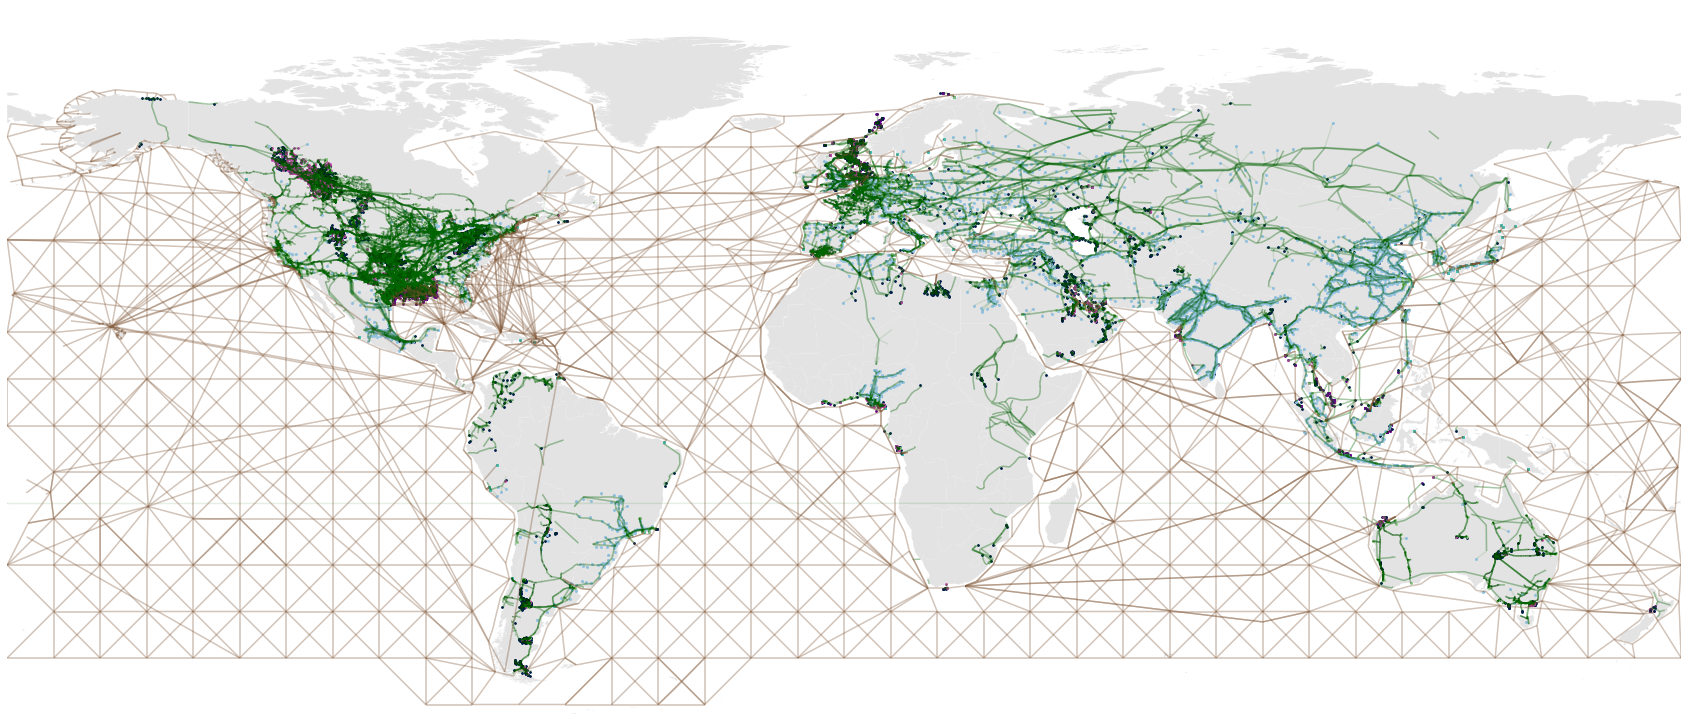

In [44]:
#def vis_connected_network(G):
fig, ax = plt.subplots(1,1,figsize=(30,20))
ne.plot(ax=ax, color='#e3e3e3')

# plot edges: shipping, pieplines
edge_gdf[(edge_gdf['start_type']=='pipe') | (edge_gdf['end_type']=='pipe') ].plot(ax=ax, colors=colors['pipelines'], alpha=0.1)
edge_gdf[(edge_gdf['start_type']=='shipping') | (edge_gdf['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.1)



# plot oil_field, well_pad, lng, city, power

node_gdf[(node_gdf['type']=='lng')].plot(ax=ax, color=colors['lng'], markersize=4)
node_gdf[(node_gdf['type']=='well')].plot(ax=ax, color=colors['well_pads'], markersize=3)
node_gdf[(node_gdf['type']=='oil')].plot(ax=ax, color=colors['oil_fields'], markersize=3)
node_gdf[(node_gdf['type']=='processing')].plot(ax=ax, color=colors['processing_plants'], markersize=3)

node_gdf[(node_gdf['type']=='city') & (node_gdf['D']>0)].plot(ax=ax, color=colors['cities'], markersize=4)
node_gdf[(node_gdf['type']=='power') & (node_gdf['D']>0)].plot(ax=ax, color=colors['power_stations'], markersize=3)


ax.set_xlim([-180,180])
ax.set_ylim([-62,90])
ax.axis('off')
fig.savefig('gas_supplynetwork.png')

plt.show()

### Force-Directed Layout

Out of memory error... loolll
... try again once having run community detection

In [173]:
edge_df['z_inv'] = 1/(edge_df['z']+1)

In [184]:
len(node_df.node.unique())

1024383

In [189]:
# get pos as dict
pos = node_df.drop_duplicates(subset='node')[['node','coordinates']].set_index('node').to_dict('index')

In [190]:
pos = {kk:json.loads(vv['coordinates']) for kk, vv in pos.items()}

In [193]:
z_inv_attr = edge_df[['start','end','z_inv']].set_index(['start','end']).to_dict(orient='index')

In [194]:
nx.set_edge_attributes(gen.G, z_inv_attr)

In [196]:
# pos = nx.spring_layout(gen.G, pos, iterations=1, weight='z_inv')
# big ole 'out of memory' error

### load flows and visualise them

In [45]:
flow_dict = pickle.load(open('./../gas_flow_dict.pkl','rb'))

In [46]:
len(flow_dict.keys())

1500158

In [47]:
flow_dict_reshape = {(i,j): flow_dict[i][j] 
                           for i in flow_dict.keys() 
                           for j in flow_dict[i].keys()}

In [48]:
flow_dict_reshape

{('well_pad_0', 'pipe_node_8.5598434756235824.254184564689314'): 0,
 ('pipe_node_8.5598434756235824.254184564689314',
  'pipe_node_8.5645479642844014.228145858865469'): 0,
 ('pipe_node_8.5598434756235824.254184564689314',
  'pipe_node_8.5729046487769754.272981467921507'): 0,
 ('well_pad_1', 'pipe_node_8.48343442628884.132950375949346'): 0,
 ('pipe_node_8.48343442628884.132950375949346',
  'pipe_node_8.488330269480524.116573061736341'): 0,
 ('pipe_node_8.48343442628884.132950375949346',
  'pipe_node_8.4608897401881474.134912402685865'): 0,
 ('well_pad_100', 'pipe_node_71.2990550055340419.344592084366305'): 0,
 ('pipe_node_71.2990550055340419.344592084366305',
  'pipe_node_71.2877469083372519.33804766282397'): 0,
 ('well_pad_101', 'pipe_node_71.4380670659815419.285623732897836'): 0,
 ('pipe_node_71.4380670659815419.285623732897836',
  'pipe_node_71.521068063640519.342922009262853'): 0,
 ('well_pad_1010', 'pipe_node_101.4699969958527710.080665622848402'): 0,
 ('pipe_node_101.4699969958527

In [49]:
flow_df = pd.DataFrame.from_dict(flow_dict_reshape, orient='index')

In [51]:
flow_df['source']=flow_df.index.str[0]

In [52]:
flow_df = flow_df[~(flow_df.source=='supersource')]

In [53]:
flow_df = flow_df.rename(columns={0:'flow'})

In [54]:
edge_df = edge_df.set_index(['start','end'])

In [55]:
edge_df['flow']=0

In [56]:
edge_df

z  \
start                                        end                                                 
well_pad_0                                   pipe_node_8.5598434756235824.254184564689314    0   
pipe_node_8.5598434756235824.254184564689314 pipe_node_8.5645479642844014.228145858865469    0   
                                             pipe_node_8.5729046487769754.272981467921507    0   
well_pad_1                                   pipe_node_8.48343442628884.132950375949346      0   
pipe_node_8.48343442628884.132950375949346   pipe_node_8.488330269480524.116573061736341     0   
...                                                                                        ...   
shipping_node_34564_B                        shipping_node_34768_B                         683   
                                             shipping_node_33992_B                         287   
shipping_node_33992_B                        shipping_node_34564_B                         287   
                                             shipping_node_34768_B                          28   
shipping_node_125192_B                       shipping_node_125717_B                        401   

                                                                                          start_type  \
start                                        end                                                       
well_pad_0                                   pipe_node_8.5598434756235824.254184564689314       well   
pipe_node_8.5598434756235824.254184564689314 pipe_node_8.5645479642844014.228145858865469       pipe   
                                             pipe_node_8.5729046487769754.272981467921507       pipe   
well_pad_1                                   pipe_node_8.48343442628884.132950375949346         well   
pipe_node_8.48343442628884.132950375949346   pipe_node_8.488330269480524.116573061736341        pipe   
...                                                                                              ...   
shipping_node_34564_B                        shipping_node_34768_B                          shipping   
                                             shipping_node_33992_B                          shipping   
shipping_node_33992_B                        shipping_node_34564_B                          shipping   
                                             shipping_node_34768_B                          shipping   
shipping_node_125192_B                       shipping_node_125717_B                         shipping   

                                                                                           end_type  \
start                                        end                                                      
well_pad_0                                   pipe_node_8.5598434756235824.254184564689314      pipe   
pipe_node_8.5598434756235824.254184564689314 pipe_node_8.5645479642844014.228145858865469      pipe   
                                             pipe_node_8.5729046487769754.272981467921507      pipe   
well_pad_1                                   pipe_node_8.48343442628884.132950375949346        pipe   
pipe_node_8.48343442628884.132950375949346   pipe_node_8.488330269480524.116573061736341       pipe   
...                                                                                             ...   
shipping_node_34564_B                        shipping_node_34768_B                         shipping   
                                             shipping_node_33992_B                         shipping   
shipping_node_33992_B                        shipping_node_34564_B                         shipping   
                                             shipping_node_34768_B                         shipping   
shipping_node_125192_B                       shipping_node_125717_B                        shipping   

                                                                                                                start_coordin

In [57]:
edge_df.loc[flow_df.index, 'flow'] = flow_df['flow']

In [58]:
edge_df.flow.sum()

8485626050

In [59]:
edge_df = edge_df.reset_index()

In [60]:
edge_df = edge_df[edge_df['start']!='supersource']

In [61]:
edge_df

,start,end,z,start_type,end_type,start_coordinates,end_coordinates,geometry,flow
0,well_pad_0,pipe_node_8.5598434756235824.254184564689314,0,well,pipe,"[8.56379921438752, 4.260457555062633]","[8.559843475623582, 4.254184564689314]","LINESTRING (8.56380 4.26046, 8.55984 4.25418)",0
1,pipe_node_8.5598434756235824.254184564689314,pipe_node_8.5645479642844014.228145858865469,0,pipe,pipe,"[8.559843475623582, 4.254184564689314]","[8.564547964284401, 4.228145858865469]","LINESTRING (8.55984 4.25418, 8.56455 4.22815)",0
2,pipe_node_8.5598434756235824.254184564689314,pipe_node_8.5729046487769754.272981467921507,0,pipe,pipe,"[8.559843475623582, 4.254184564689314]","[8.572904648776975, 4.272981467921507]","LINESTRING (8.55984 4.25418, 8.57290 4.27298)",0
3,well_pad_1,pipe_node_8.48343442628884.132950375949346,0,well,pipe,"[8.48256895983809, 4.134045965066479]","[8.4834344262888, 4.132950375949346]","LINESTRING (8.48257 4.13405, 8.48343 4.13295)",0
4,pipe_node_8.48343442628884.132950375949346,pipe_node_8.488330269480524.116573061736341,0,pipe,pipe,"[8.4834344262888, 4.132950375949346]","[8.48833026948052, 4.116573061736341]","LINESTRING (8.48343 4.13295, 8.48833 4.11657)",0
...,...,...,...,...,...,...,...,...,...
3665920,shipping_node_34564_B,shipping_node_34768_B,683,shipping,shipping,"[-70.69139099, 43.13928986]","[-70.55523682, 43.12379837]","LINESTRING (-70.69139 43.13929, -70.55524 43.1...",0
3665921,shipping_node_34564_B,shipping_node_33992_B,287,shipping,shipping,"[-70.69139099, 43.13928986]","[-70.71349335, 43.17829895]","LINESTRING (-70.69139 43.13929, -70.71349 43.1...",0
3665922,shipping_node_33992_B,shipping_node_34564_B,287,shipping,shipping,"[-70.71349335, 43.17829895]","[-70.69139099, 43.13928986]","LINESTRING (-70.71349 43.17830, -70.69139 43.1...",0
3665923,shipping_node_33992_B,shipping_node_34768_B,28,shipping,shipping,"[-70.71349335, 43.17829895]","[-70.55523682, 43.12379837]","LINESTRING (-70.71349 43.17830, -70.55524 43.1...",0


### Visualise flow

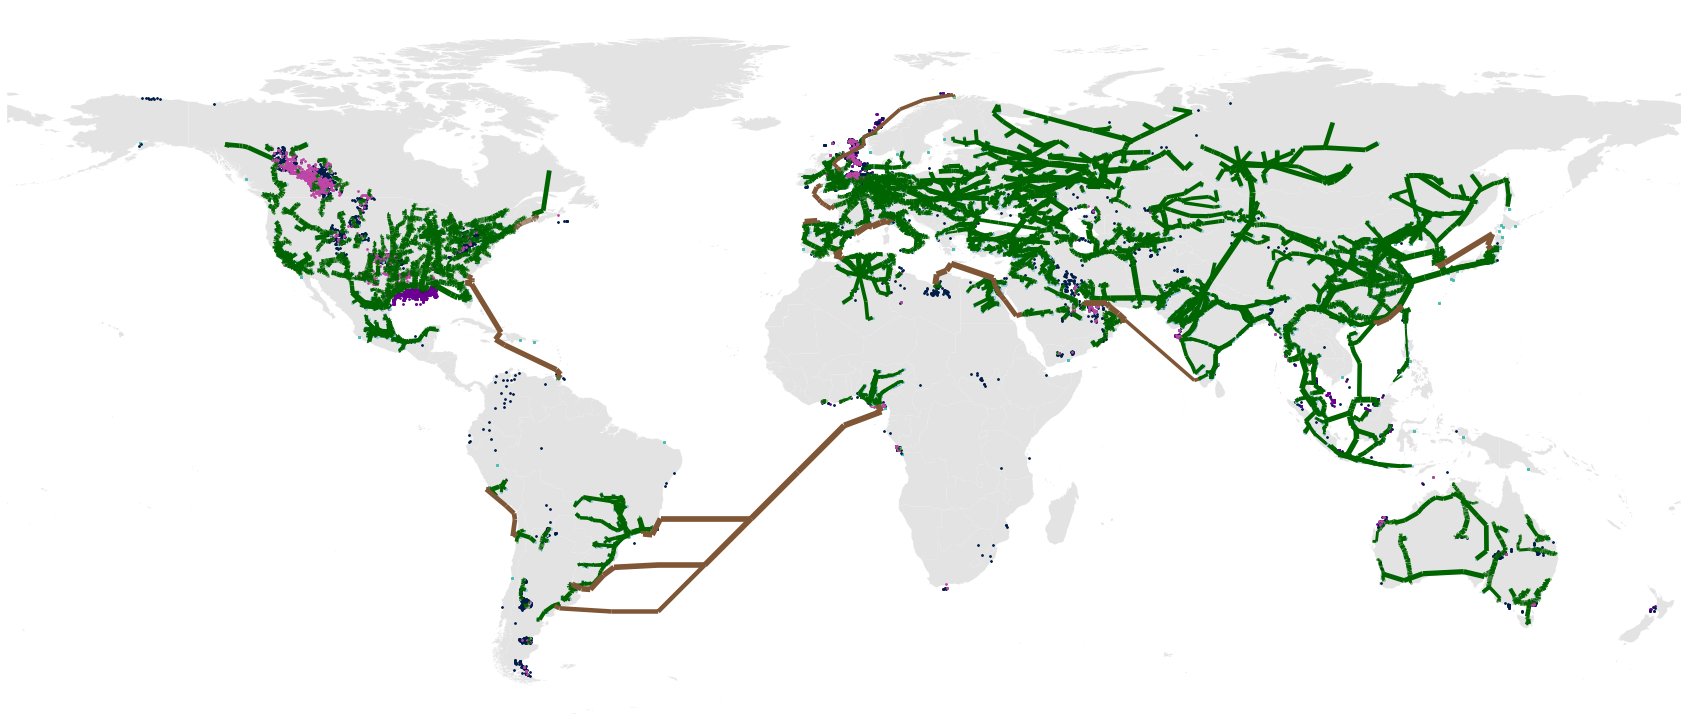

In [62]:
#def vis_connected_network(G):
fig, ax = plt.subplots(1,1,figsize=(30,20))
ne.plot(ax=ax, color='#e3e3e3')
# plot 
# plot oil_field, well_pad, lng, city, power

node_gdf[(node_gdf['type']=='lng')].plot(ax=ax, color=colors['lng'], markersize=4)
node_gdf[(node_gdf['type']=='well')].plot(ax=ax, color=colors['well_pads'], markersize=3)
node_gdf[(node_gdf['type']=='oil')].plot(ax=ax, color=colors['oil_fields'], markersize=3)
node_gdf[(node_gdf['type']=='processing')].plot(ax=ax, color=colors['processing_plants'], markersize=3)

node_gdf[(node_gdf['type']=='city') & (node_gdf['D']>0)].plot(ax=ax, color=colors['cities'], markersize=4)
node_gdf[(node_gdf['type']=='power') & (node_gdf['D']>0)].plot(ax=ax, color=colors['power_stations'], markersize=3)

###

# plot edges
segs = []
line_widths=[]
line_colors = []

for edge in edge_df[(edge_df['flow']>0) & ((edge_gdf['start_type']=='pipe') | (edge_gdf['end_type']=='pipe'))].iterrows():
    segs.append(list(edge[1]['geometry'].coords))
    line_widths.append(np.log10(edge[1]['flow']))
    line_colors.append(colors['pipelines'])
    
for edge in edge_df[(edge_df['flow']>0) & ((edge_gdf['start_type']=='shipping') | (edge_gdf['end_type']=='shipping'))].iterrows():
    segs.append(list(edge[1]['geometry'].coords))
    line_widths.append(np.log10(edge[1]['flow']))
    line_colors.append(colors['shipping'])

line_collection = LineCollection(segs, linewidths=line_widths, colors=line_colors)
    
ax.add_collection(line_collection)
    
ax.set_xlim([-180,180])
ax.set_ylim([-62,90])
ax.axis('off')
fig.savefig('gas_flownetwork.png')

plt.show()

### Check pipelines

In [247]:
pipelines_df = pd.read_csv(all_data_dirs['pipelines-pipelines'])

In [248]:
all_nodes

,node_ID,coordinates
0,city_node_0,"[70.3302479906805, 37.76840637200007]"
1,city_node_1,"[69.91406604103679, 36.969858182710496]"
2,city_node_2,"[73.55249175449624, 37.13755340600005]"
3,city_node_3,"[68.66072971923218, 36.93501161119775]"
4,city_node_4,"[69.80669794370749, 36.44594427548354]"
...,...,...
9840,well_pad_9840,"[-90.87808476912353, 28.839718754622925]"
9841,well_pad_9841,"[-90.82512218382949, 28.87361665367242]"
9842,well_pad_9842,"[-91.08767461854396, 28.29956690464191]"
9843,well_pad_9843,"[-91.45741329506177, 28.244583012809247]"


In [249]:
pipelines_df = pipelines_df.merge(all_nodes.drop_duplicates(subset='node_ID'), how='left', left_on='StartNodeId:START_ID(PipelineNode)', right_on='node_ID')

In [251]:
pipelines_df = pipelines_df.merge(all_nodes.drop_duplicates(subset='node_ID'), how='left', left_on='EndNodeId:END_ID(PipelineNode)', right_on='node_ID')

In [270]:
pipelines_df[pipelines_df['coordinates_x'].isna()]

,Unnamed: 0,StartNodeId:START_ID(PipelineNode),EndNodeId:END_ID(PipelineNode),:TYPE,distance,impedance,node_ID_x,coordinates_x,node_ID_y,coordinates_y
829770,829770,p,p,PIPELINE_CONNECTION,0.037871,0.001434,NaN,NaN,NaN,NaN
829771,829771,p,p,PIPELINE_CONNECTION,0.002931,0.000009,NaN,NaN,NaN,NaN
829772,829772,p,p,PIPELINE_CONNECTION,0.700764,0.491070,NaN,NaN,NaN,NaN
829773,829773,p,p,PIPELINE_CONNECTION,0.698063,0.487292,NaN,NaN,NaN,NaN
829774,829774,p,p,PIPELINE_CONNECTION,0.786355,0.618355,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
949057,949057,pipe_node_-95.9655529999953732.16205900040267,pipe_node_-95.9660980000065332.16205900040267,PIPELINE_CONNECTION,0.666440,0.444142,NaN,NaN,pipe_node_-95.9660980000065332.16205900040267,"[-95.96609800000653, 32.16205900040267]"
949058,949058,pipe_node_149.0514016985759-25.892028915095715,pipe_node_149.06160953568602-25.88570218712019,PIPELINE_CONNECTION,7.407408,54.869691,NaN,NaN,NaN,NaN
949059,949059,pipe_node_-98.6572359994168635.829345999964104,pipe_node_-98.6523850000740635.82432100011652,PIPELINE_CONNECTION,2.657773,7.063756,NaN,NaN,NaN,NaN
949062,949062,pipe_node_-102.842322773856247.6827577456162,pipe_node_-102.8786673640261947.62329886400613,PIPELINE_CONNECTION,11.690045,136.657143,NaN,NaN,NaN,NaN


In [ ]:
pipe_node_-102.842322773856247.6827577456162	

In [273]:
mm = 'pipe_node_-95.965'
len(mm)

17

In [274]:
all_nodes[all_nodes['node_ID'].str[:17]==mm]

,node_ID,coordinates
64629,pipe_node_-95.9657560004607929.522648000294154,"[-95.96575600046079, 29.522648000294154]"
64630,pipe_node_-95.9657100005314334.960062999951376,"[-95.96571000053143, 34.960062999951376]"
64631,pipe_node_-95.9656130003360329.592172999715494,"[-95.96561300033603, 29.592172999715494]"
64632,pipe_node_-95.965567999503534.546815999726135,"[-95.9655679995035, 34.546815999726135]"
64633,pipe_node_-95.9655110000103435.46322299995385,"[-95.96551100001034, 35.46322299995385]"
64634,pipe_node_-95.9655066406955727.88224352008478,"[-95.96550664069557, 27.88224352008478]"
64635,pipe_node_-95.9651100005625928.902147000184748,"[-95.96511000056259, 28.902147000184748]"


In [214]:
dd = {'meow':{'a':2,'b':5},'woof':{'b':7,'d':6}}

In [215]:
a = pd.DataFrame.from_dict(dd, orient='index')

In [216]:
a=a.unstack()

In [218]:
a[a>0].reset_index()

,level_0,level_1,0
0,a,meow,2.0
1,b,meow,5.0
2,b,woof,7.0
3,d,woof,6.0


In [226]:
for ii_k, (kk, vv) in enumerate(flow_dict.items()):
    if ii_k%2500==0:
        print (ii_k)
    for kk2, flowval in vv.items():
        if flowval>0:
            edge_df.loc[(kk,kk2),'flow'] = flowval

0
2500
5000
7500
10000
12500
15000
17500
20000
22500
25000
27500
30000
32500
35000
37500
40000
42500
45000
47500
50000
52500
55000
57500
60000
62500
65000
67500
70000
72500
75000
77500
80000
82500
85000
87500
90000
92500
95000
97500
100000
102500
105000
107500
110000
112500
115000
117500
120000
122500
125000
127500
130000
132500
135000
137500
140000
142500
145000
147500
150000
152500
155000
157500
160000
162500
165000
167500
170000
172500
175000
177500
180000
182500
185000
187500
190000
192500
195000
197500
200000
202500
205000
207500
210000
212500
215000
217500
220000
222500
225000
227500
230000
232500
235000
237500
240000
242500
245000
247500
250000
252500
255000
257500
260000
262500
265000
267500
270000
272500
275000
277500
280000
282500
285000
287500
290000
292500
295000
297500
300000
302500
305000
307500
310000
312500
315000
317500
320000
322500
325000
327500
330000
332500
335000
337500
340000
342500
345000
347500
350000
352500
355000
357500
360000
362500
365000
367500
370000
3725

KeyboardInterrupt: 